# 🍷 Wine Quality Data Visualization with Seaborn

This notebook presents five unique Seaborn visualizations using the **Wine Quality Dataset** from the UCI Machine Learning Repository. We focus on exploring various relationships and distributions within the data to gain insight into what makes a wine high or low quality.

## 📊 Dataset Overview
**Source**: [Wine Quality - UCI Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality)

The dataset includes chemical and physical properties of Portuguese red and white wines. Each wine is rated on a quality scale from 0 to 10.

**Features include**: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

**Target variable**: `quality` – Integer score representing wine quality


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the red wine dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Preview the dataset
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 📈 1. Boxplot – Alcohol Content by Wine Quality
**Purpose:**
This visualization examines how alcohol content varies across different wine quality ratings. Alcohol plays a role in the perception of flavor and strength in wine, which can influence the overall quality rating. This boxplot groups wines by quality score (x-axis), displaying the alcohol percentage (y-axis) for each group.

**Data & Marks:**
Each box shows the interquartile range (IQR) of alcohol content for a given quality score. The horizontal line inside the box is the median. The whiskers represent the data spread, and dots beyond them represent outliers. Color is encoded by the quality score for visual clarity, although it’s not adding an analytical dimension.

**Insights & Contrast:**
There is a clear upward trend: wines rated higher (7 and 8) have generally higher alcohol content compared to lower-rated wines (3, 4, 5). The contrast in median alcohol levels between qualities 5 and 8 is particularly notable. Outliers in quality 6 and 7 suggest some variability even in higher-rated wines.

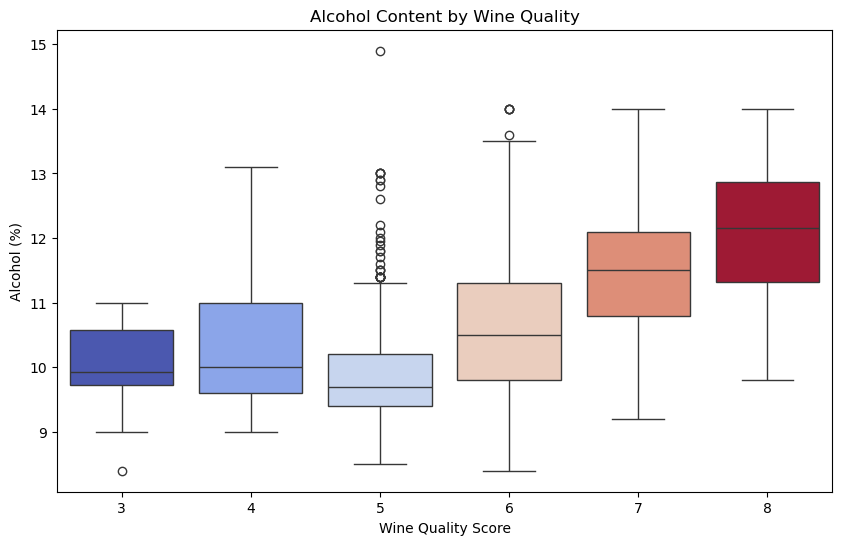

In [5]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', data=df, hue='quality', palette='coolwarm', legend=False)
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality Score')
plt.ylabel('Alcohol (%)')
plt.savefig('DanielTongu_Alcohol_vs_Quality.png')
plt.show()

## 🎻 2. Violin Plot – pH Distribution by Wine Quality
**Purpose:**
This violin plot visualizes the distribution and density of pH levels across wine quality ratings. Since pH affects acidity and preservation, it is a key chemical property relevant to wine production and taste.

**Data & Marks:**
Each violin is a mirrored density plot for a given wine quality. The width of the violin at a given point represents how many wines have that pH value. The white dot indicates the median, and the thick bar shows the IQR. Colors reflect the quality levels to maintain consistency across visualizations.

**Insights & Contrast:**
Unlike alcohol, pH does not show a strong upward or downward trend across quality levels. Most violins are similarly shaped and centered around pH 3.2–3.4. This suggests pH has less contrast between quality categories, implying it may be less predictive of wine quality.

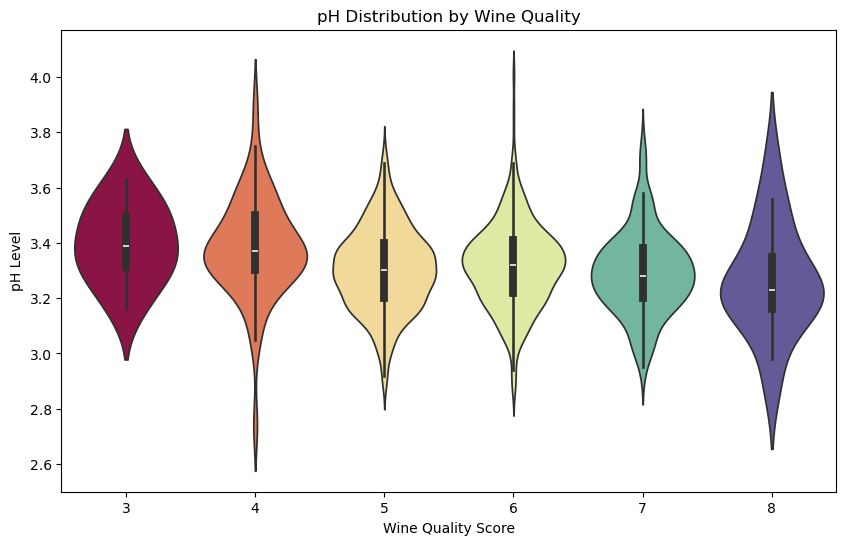

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='quality', y='pH', data=df, hue='quality', palette='Spectral', legend=False)
plt.title('pH Distribution by Wine Quality')
plt.xlabel('Wine Quality Score')
plt.ylabel('pH Level')
plt.savefig('DanielTongu_pH_vs_Quality.png')
plt.show()

## 📊 3. Count Plot – Wine Quality Distribution
**Purpose:**
This count plot shows how many wines fall into each quality category. It highlights how balanced or imbalanced the dataset is, which is important for analysis or training machine learning models.

**Data & Marks:**
Each bar represents the count of wine samples (y-axis) for a specific quality score (x-axis). Bars are colored by quality but have no analytical role in this case—just visual distinction.

**Insights & Contrast:**
Most wines are rated 5 or 6, creating a skewed distribution. Very few wines are rated 3, 4, 8, or higher. This class imbalance suggests that wine quality scores in the dataset are clustered around average ratings, with few very poor or exceptional wines. This has implications for modeling and generalizability.

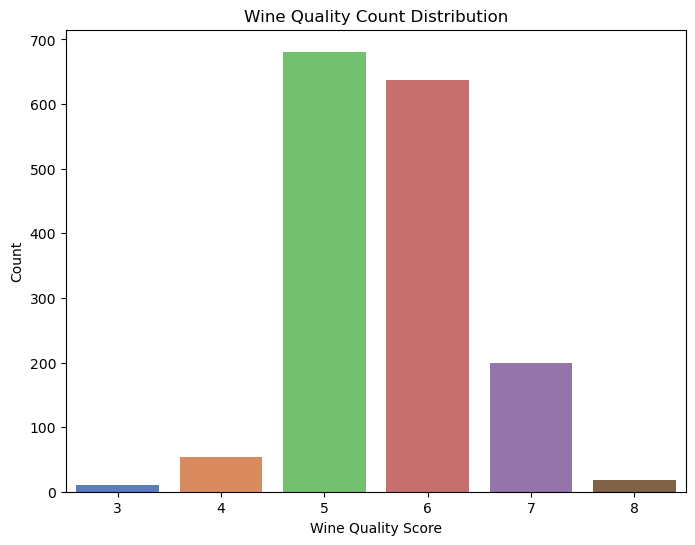

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=df, hue='quality', palette='muted', legend=False)
plt.title('Wine Quality Count Distribution')
plt.xlabel('Wine Quality Score')
plt.ylabel('Count')
plt.savefig('DanielTongu_Quality_Count.png')
plt.show()

## 🔥 4. Heatmap – Feature Correlation Matrix
**Purpose:**
This heatmap shows pairwise correlations among all numerical variables. It helps identify features that have strong linear relationships, either with each other or with the target variable: quality.

**Data & Marks:**
Each cell in the matrix represents the Pearson correlation coefficient between two variables, ranging from -1 (perfect inverse) to 1 (perfect direct correlation). Colors encode the strength of correlation: red for positive, blue for negative. Numerical values are printed inside each cell for precision.

**Insights & Contrast:**
The most positively correlated feature with wine quality is alcohol, while volatile acidity shows a moderate negative correlation. Features like residual sugar and citric acid show very weak or mixed correlations. This visual encoding quickly identifies features with potential predictive value.

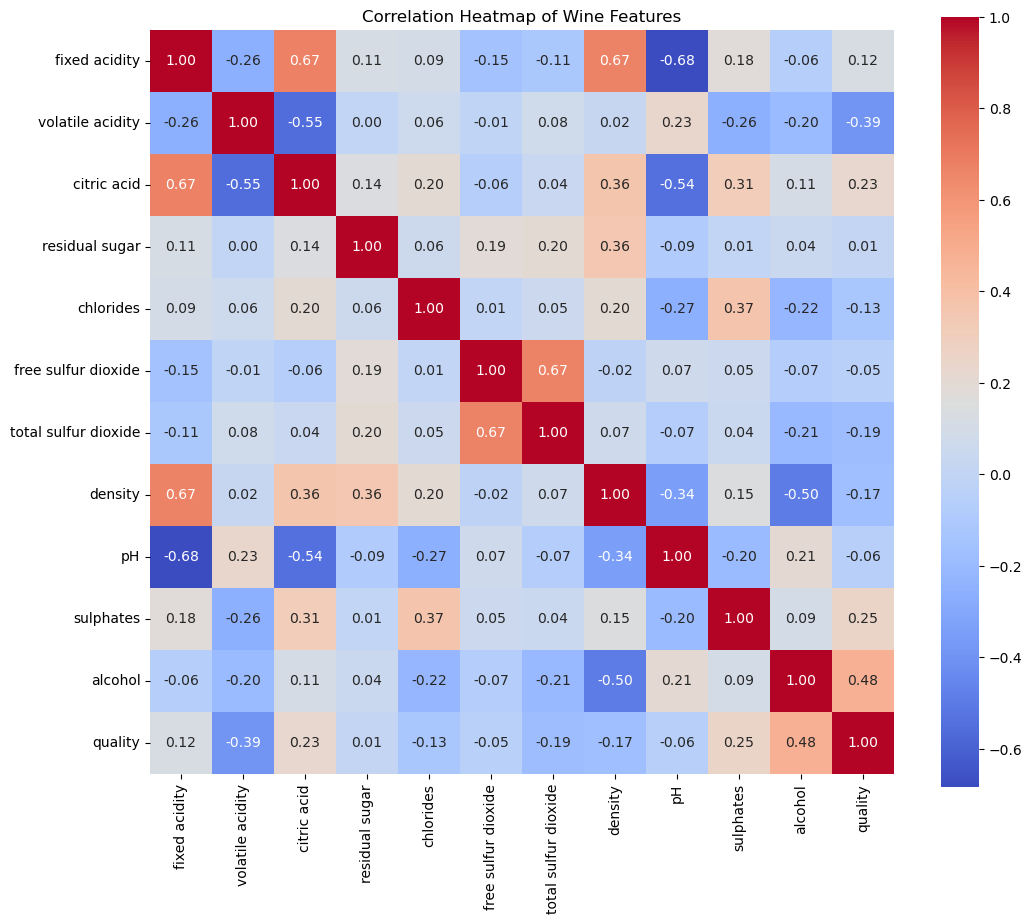

In [29]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Wine Features')
plt.savefig('DanielTongu_Correlation_Heatmap.png')
plt.show()

## 🔍 5. Pair Plot – Selected Features and Quality
**Purpose:**
This plot examines pairwise relationships between key features (alcohol, sulphates, pH) and how they relate to wine quality. It’s useful for detecting trends, patterns, or clusters that might indicate separation between classes.

**Data & Marks:**
Each scatter plot shows the relationship between two variables, while the diagonal contains histograms showing the distribution of individual variables. Points are colored by wine quality, creating a visual link between numeric features and the target variable.

**Insights & Contrast:**
Clear clustering can be observed—especially with alcohol and sulphates—where higher-quality wines tend to group toward the upper ends of these axes. pH, however, shows less separation. This supports the idea that alcohol and sulphates may be stronger indicators of wine quality than pH.

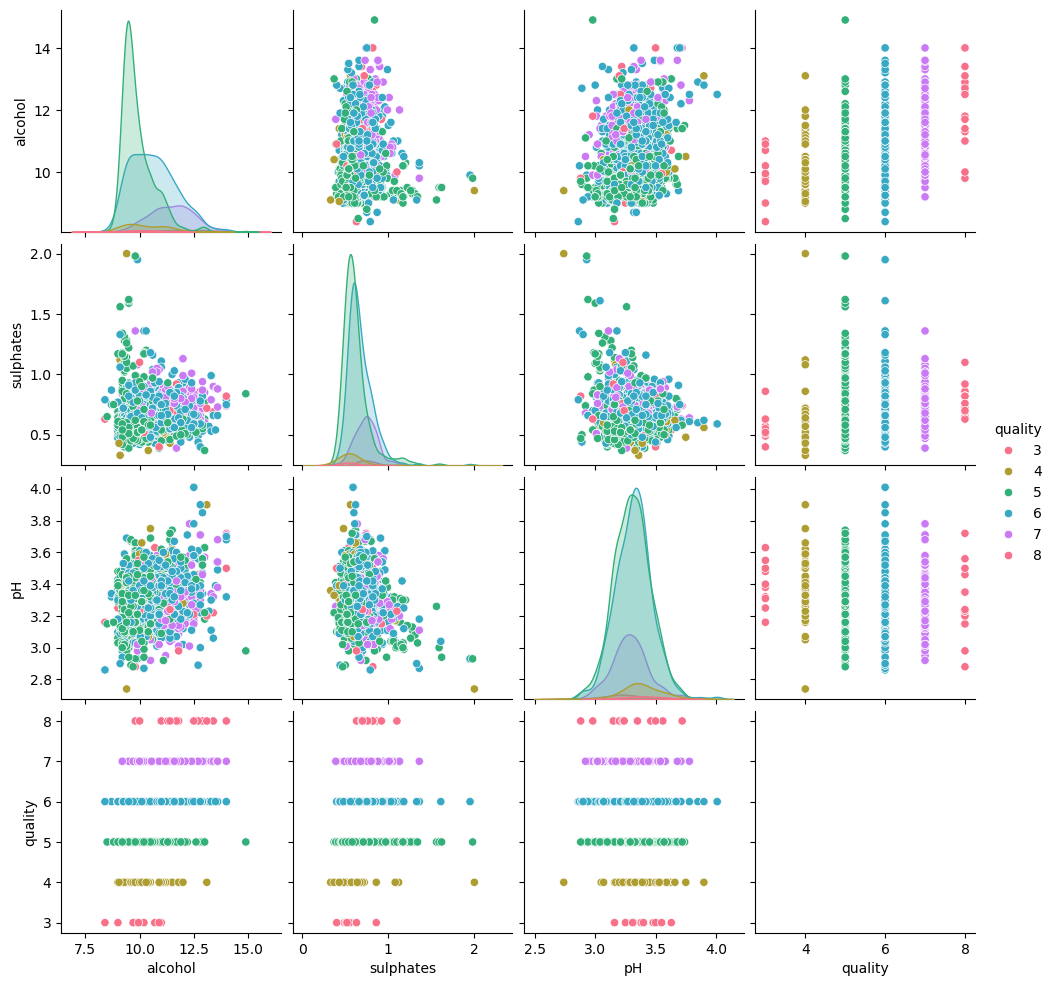

In [15]:
sns.pairplot(df, vars=['alcohol', 'sulphates', 'pH', 'quality'], hue='quality', palette='husl')
plt.savefig('DanielTongu_PairPlot_SelectedFeatures.png')
plt.show()